In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [3]:
filepath = "Resources/JohSouthAfricaAQI.csv"
SoAfAQIDF = pd.read_csv(filepath , delimiter=", ")
SoAfAQIDF

,date,pm25,pm10,o3,no2,so2,co
0,2020/7/2,83.0,49.0,13.0,9.0,1,7.0
1,2020/7/3,99.0,39.0,10.0,11.0,11,5.0
2,2020/7/4,84.0,55.0,19.0,12.0,6,6.0
3,2020/7/5,110.0,39.0,15.0,7.0,2,5.0
4,2020/7/6,89.0,48.0,10.0,13.0,4,9.0
...,...,...,...,...,...,...,...
684,2018/12/12,NaN,33.0,16.0,7.0,1,7.0
685,2018/8/27,NaN,22.0,11.0,6.0,1,2.0
686,2019/5/2,NaN,NaN,7.0,5.0,3,14.0
687,2019/5/9,NaN,NaN,2.0,12.0,1,4.0


In [4]:
SoAfAQIDF["date"] = SoAfAQIDF["date"].astype(str)
SoAfAQIDF[["year","month","day"]] = SoAfAQIDF["date"].str.split("/", n=2, expand=True)
SoAfAQIDF["month"] = SoAfAQIDF["month"].astype(int)
SoAfAQIDF["year"] = SoAfAQIDF["year"].astype(int)
SoAfAQIDF = SoAfAQIDF[SoAfAQIDF["month"] < 8]
SoAfAQIDF["month"] = SoAfAQIDF["month"].astype(str)
SoAfAQIDF

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020/7/2,83.0,49.0,13.0,9.0,1,7.0,2020,7,2
1,2020/7/3,99.0,39.0,10.0,11.0,11,5.0,2020,7,3
2,2020/7/4,84.0,55.0,19.0,12.0,6,6.0,2020,7,4
3,2020/7/5,110.0,39.0,15.0,7.0,2,5.0,2020,7,5
4,2020/7/6,89.0,48.0,10.0,13.0,4,9.0,2020,7,6
...,...,...,...,...,...,...,...,...,...,...
675,2019/2/20,NaN,40.0,7.0,6.0,1,4.0,2019,2,20
676,2019/2/25,NaN,15.0,11.0,8.0,1,11.0,2019,2,25
686,2019/5/2,NaN,NaN,7.0,5.0,3,14.0,2019,5,2
687,2019/5/9,NaN,NaN,2.0,12.0,1,4.0,2019,5,9


In [5]:
SoAfAQIDF["year"].value_counts()

2019    206
2020    204
Name: year, dtype: int64

In [21]:
SoAf2019AQIDF = SoAfAQIDF[SoAfAQIDF["year"] == 2019]
SoAf2019AQIDF.dropna(subset=["pm25"], inplace=True)
SoAf2019AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
SoAf2019AQIDF.reset_index(drop=True, inplace=True)
AQI2019 = []

for value in SoAf2019AQIDF["pm25"]:
    if value > 0 and value <= 12:
        AQI2019.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2019.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2019.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2019.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2019.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2019.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2019.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2019.append("invalid")
#Add list to data frame, then drop rows with invalid values
SoAf2019AQIDF["AQI"] = AQI2019
SoAf2019AQIDF = SoAf2019AQIDF[SoAf2019AQIDF["AQI"] != "invalid" ]
#round it up
SoAf2019AQIDF["AQI"] = [round(i) for i in SoAf2019AQIDF["AQI"]]

SoAf2019 = SoAf2019AQIDF.groupby(["month"]).agg({"AQI":["mean","sem"]})
SoAf2019.rename(columns={"mean":"2019 Mean AQI","sem":"2019 SEM"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
SoAf2019.columns = SoAf2019.columns.droplevel()
SoAf2019 = SoAf2019.astype(int)
SoAf2019

,2019 Mean AQI,2019 SEM
month,,
Jan,153,5
Feb,163,4
March,155,2
April,151,4
May,166,1
June,169,1
July,165,2


In [22]:
SoAf2020AQIDF = SoAfAQIDF[SoAfAQIDF["year"] == 2020]
SoAf2020AQIDF.dropna(subset=["pm25"], inplace=True)
SoAf2020AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
SoAf2020AQIDF.reset_index(drop=True, inplace=True)
AQI2020 = []

for value in SoAf2020AQIDF["pm25"]:
    if value > 0 and value <= 12:
        AQI2020.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2020.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2020.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2020.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2020.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2020.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2020.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2020.append("invalid")
#Add list to data frame, then drop rows with invalid values
SoAf2020AQIDF["AQI"] = AQI2020
SoAf2020AQIDF = SoAf2020AQIDF[SoAf2020AQIDF["AQI"] != "invalid" ]
#round it up
SoAf2020AQIDF["AQI"] = [round(i) for i in SoAf2020AQIDF["AQI"]]

SoAf2020 = SoAf2020AQIDF.groupby(["month"]).agg({"AQI":["mean","sem"]})
SoAf2020.rename(columns={"mean":"2020 Mean AQI","sem":"2020 SEM"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
SoAf2020.columns = SoAf2020.columns.droplevel()
SoAf2020 = SoAf2020.astype(int)
SoAf2020

,2020 Mean AQI,2020 SEM
month,,
Jan,193,11
Feb,178,9
March,157,2
April,143,3
May,163,2
June,171,2
July,169,2


In [23]:
SoAfDF = pd.concat([SoAf2019,SoAf2020], axis=1)
SoAfDF.to_csv("FinalCityCSV/SouthAfricaFinalDF.csv")
SoAfDF

,2019 Mean AQI,2019 SEM,2020 Mean AQI,2020 SEM
month,,,,
Jan,153,5,193,11
Feb,163,4,178,9
March,155,2,157,2
April,151,4,143,3
May,166,1,163,2
June,169,1,171,2
July,165,2,169,2


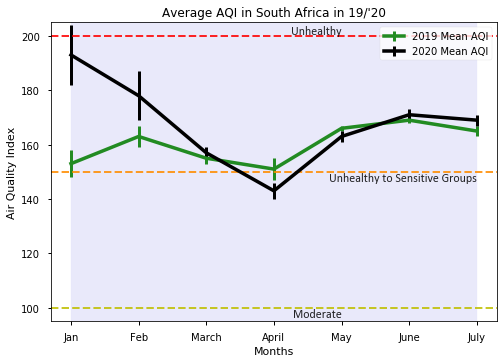

In [24]:
#plot some stuff bruh
plt.style.use('seaborn-notebook')
plt.errorbar(SoAfDF.index, SoAfDF["2019 Mean AQI"], yerr=SoAfDF["2019 SEM"], color="forestgreen", linewidth=3.5, elinewidth=3, label="2019 Mean AQI")
plt.errorbar(SoAfDF.index, SoAfDF["2020 Mean AQI"], yerr=SoAfDF["2020 SEM"], color="black", linewidth=3.5, elinewidth=3, label="2020 Mean AQI")
#plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
#plt.text(6,301,'Very Unhealthy', ha='right', va='top', fontsize=12, family='calibri', alpha=.5)
plt.axhline(y=200,color='r', alpha=.85, linestyle='--', lw=2)
plt.text(4,200,'Unhealthy', ha='right', va='bottom', fontsize=12,family='calibri',alpha=.85)
plt.axhline(y=150,color='darkorange', alpha=.85, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='top', fontsize=12,family='calibri',alpha=.85)
plt.axhline(y=100,color='y', alpha=.85, linestyle='--', lw=2)
plt.text(4,100,'Moderate', ha='right', va='top', fontsize=12,family='calibri',alpha=.85)
#plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
#plt.text(6,50,'Good', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.title("Average AQI in South Africa in 19/'20")
plt.ylabel("Air Quality Index")
plt.xlabel("Months")

#Need data for arguments 
x = np.arange(7)
y1 = 205
y2 = 95
plt.fill_between(x, y1, y2, where = y1 > y2,  color="lavender", alpha = 0.85)

#limit the y axis
plt.ylim(95,205)
plt.legend(loc="best")

#Make objects for legend to pick up and describe background
#backleg = [Patch(facecolor="red", label="Unhealthy"), Patch(facecolor="orange", label="Warning4SensitiveGrps")]
#plt.fill_between(x, y2, y3, where = y2 > y3,  color="orange", alpha = 0.35, label="Warning4SensitiveGrps")

#plt.plot(SoAfDF["2019 Mean AQI"], color="forestgreen", marker="o", linewidth=3.5, markersize=8, label="2019 MeanAQI")
#plt.plot(SoAfDF["2020 Mean AQI"], color="black", marker="o", linewidth=3.5, markersize=8, label="2020 MeanAQI")
#bins = [0,50,100,150,200,300,500]
#y3 = 100
#quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]


plt.savefig("SavedFigures/SouthAfricaAQI.png")